In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import factor_analyzer as fa
import copy

tss_df = pd.read_csv("data/combined_data.csv")
items_descr = pd.read_csv("data/description_items.csv")

tss_df.drop(columns="Unnamed: 0", inplace=True)

items_descr.set_index("Unnamed: 0", drop=True, inplace=True)
items_descr.index.set_names("item_label", inplace=True)
items_descr = pd.Series(items_descr.iloc[:, 0], name="item description")

tss_df.head(3)

response_id   story_id        prompt_label preset_label     sample  \
0  R_3LZPTbqxmeWvp7w   GEN_HF_6        High Fantasy      Genesis  Community   
1  R_3CCMkj9T7UgOtgP   ALL_HR_3  Historical Romance  All-Nighter  Community   
2  R_3PBKFhmDXlAQNO6  ALL_HOR_2              Horror  All-Nighter  Community   

   tss_coh_1  tss_coh_2  tss_coh_3  tss_coh_4  tss_coh_5  ...  \
0        2.0        4.0        4.0        4.0        4.0  ...   
1        2.0        4.0        2.0        1.0        2.0  ...   
2        5.0        5.0        1.0        1.0        3.0  ...   

                 start                  end  duration_in_sec  \
0  2022-02-17 07:41:22  2022-02-17 07:58:46             1044   
1  2022-02-17 07:52:11  2022-02-17 08:01:19              548   
2  2022-02-17 07:55:22  2022-02-17 08:03:16              473   

              recorded                                          tss_order  \
0  2022-02-17 07:58:47  I had a hard time making sense of what was goi...   
1  2022-02-17 08:01:20  I had a hard time making sense of what was goi...   
2  2022-02-17 08:03:16  I had a hard time making sense of what was goi...   

   qual_check_1  qual_check_1_order  qual_check_2  pass_qual_1  pass_qual_2  
0           NaN                 NaN           NaN          NaN          NaN  
1           NaN                 NaN           NaN          NaN          NaN  
2           NaN                 NaN           NaN          NaN          NaN  

[3 rows x 92 columns]

In [15]:
item_labels_li = [
    'tss_coh_1', 'tss_coh_2', 'tss_coh_3', 'tss_coh_4',
    'tss_coh_5', 'tss_coh_6', 'tss_coh_7', 'tss_coh_8', 'tss_coh_9',
    'tss_coh_10', 'tss_coh_11', 'tss_coh_12', 'tss_conch_1', 'tss_conch_2',
    'tss_conch_3', 'tss_conch_4', 'tss_conch_5', 'tss_conch_6',
    'tss_conch_7', 'tss_conch_8', 'tss_cre_1', 'tss_cre_2', 'tss_cre_3',
    'tss_cre_4', 'tss_cre_5', 'tss_cre_6', 'tss_cre_7', 'tss_cre_8',
    'tss_cre_9', 'tss_cre_10', 'tss_cre_11', 'tss_cre_12', 'tss_qua_1',
    'tss_qua_2', 'tss_qua_3', 'tss_qua_4', 'tss_qua_5', 'tss_qua_6',
    'tss_qua_7', 'tss_qua_8', 'tss_rep_1', 'tss_rep_2', 'tss_rep_3',
    'tss_rep_4', 'tss_rep_5', 'tss_rep_6', 'tss_rep_7', 'tss_rep_8',
    'tss_rep_9', 'tss_rep_10', 'tss_rep_11', 'tss_rep_12', 'tss_sty_1',
    'tss_sty_2', 'tss_sty_3', 'tss_sty_4', 'tss_sty_5', 'tss_sty_6',
    'tss_sty_7', 'tss_sty_8', 'tss_sty_9', 'tss_sty_10', 'tss_sty_11',
    'tss_sty_12', 'tss_pac_1', 'tss_pac_2', 'tss_pac_3', 'tss_pac_4',
    'tss_pac_5', 'tss_pac_6', 'tss_pac_7', 'tss_pac_8', 'tss_pac_9'
]


# check if items are appropriate for EFA
# correlations mostly |.3|-|.8|
items_corr = tss_df[item_labels_li].corr()

extreme_corrs_count_dict = {}
high_corr_li = []

# print out extreme corrs
total_report = ""
for index, row in items_corr.iterrows():
    variable1 = index
    corrs = row
    i = 0
    count = 0
    for variable2, corr in corrs.iteritems():
        if (variable1 != variable2) and ((abs(corr) < 0.3) or (abs(corr) > 0.8)):
            count += 1
            if abs(corr) > 0.8:
                high_corr_li.append((variable1, variable2, corr))
        i += 1
    extreme_corrs_count_dict[variable1] = count

extreme_corrs_count = pd.Series(extreme_corrs_count_dict)
print("Descriptives for extreme correlation count:")
print(extreme_corrs_count.describe())

# uhmm that are more extreme correlations as I would like
# but maybe subscales are fairly orthogonal?

Descriptives for extreme correlation count:
count    73.000000
mean     50.273973
std      10.387306
min      27.000000
25%      42.000000
50%      52.000000
75%      58.000000
max      70.000000
dtype: float64


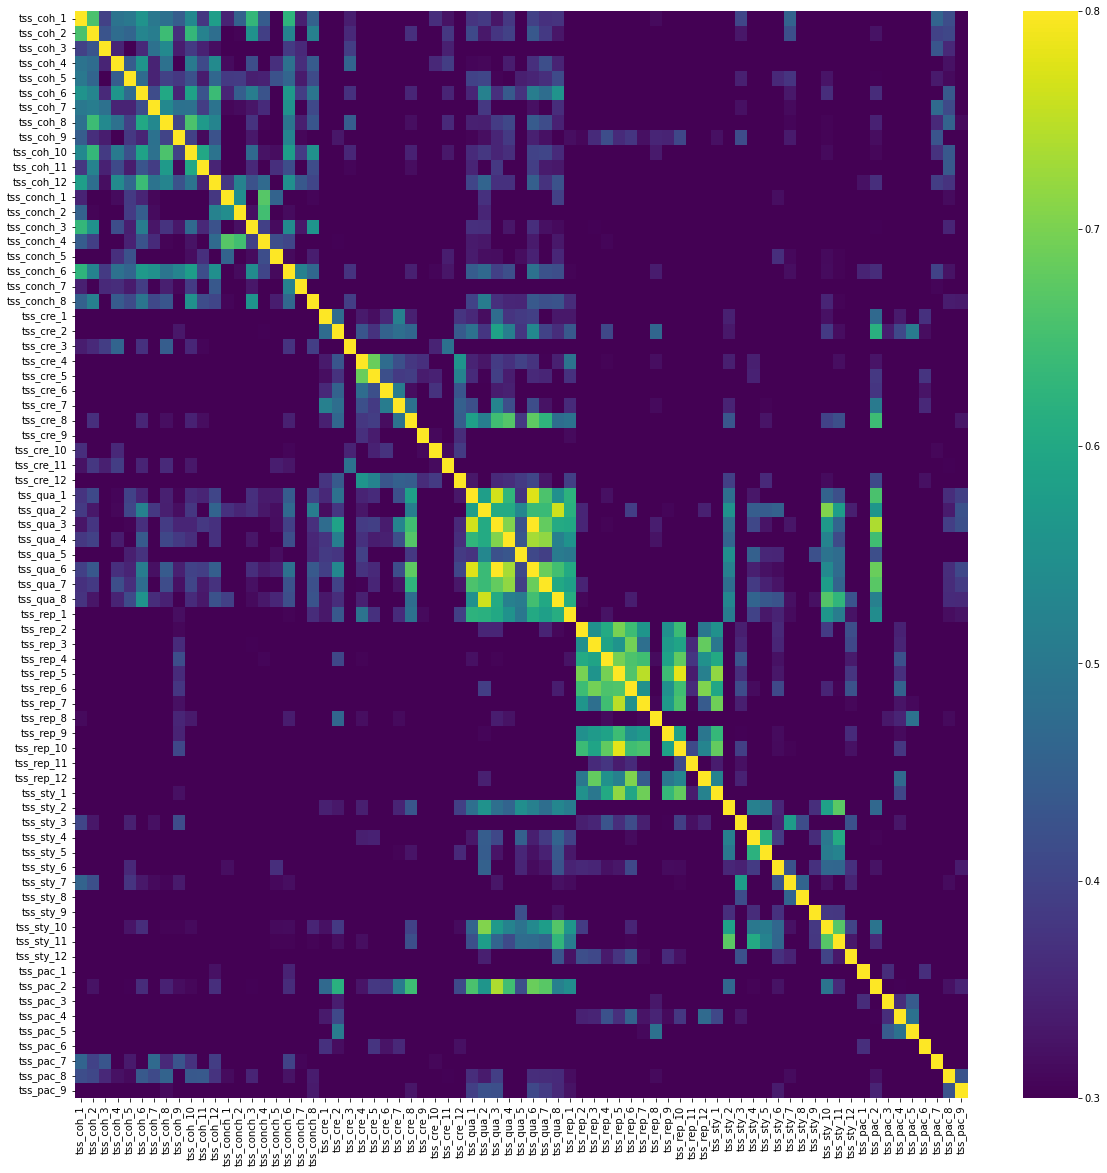

In [16]:
# Let us look at a heatmap (absolute values of correlations)
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(abs(items_corr),
                 xticklabels=items_corr.columns.values,
                 yticklabels=items_corr.columns.values,
                 ax=ax, cmap="viridis", vmin=0.3, vmax=0.8)

# most item clusters are just surprising orthogonal (which is actually nice)

In [17]:
# Inspect suspicious items with low correlations here
susp_items = [
    "tss_cre_9", "tss_cre_10"
    "tss_rep_8",
    "tss_sty_8", "tss_sty_9"
    "tss_pac_1", "tss_pac_3", "tss_pac_5", "tss_pac_6"
]

for index, row in items_corr.iterrows():
    if index in susp_items:
        print("{}: {}".format(index, items_descr[index]))
        print("Correlations >= .3:")
        if row[(row >= .3) & (row.index != index)].empty:
            print("NONE - ALL correlations are < .3!")
        else:
            print(row[(row > .3) & (row.index != index)].to_string())
        print("")

tss_cre_9: The setting of the story was original.
Correlations >= .3:
tss_cre_4     0.366541
tss_cre_5     0.338780
tss_cre_10    0.309996
tss_cre_12    0.361911
tss_rep_1     0.312869

tss_sty_8: The writing style was too complicated to be understood easily.
Correlations >= .3:
tss_sty_3    0.416379

tss_pac_3: It took a long time for things to happen in the story.
Correlations >= .3:
tss_cre_2    0.340185
tss_rep_8    0.332453
tss_pac_4    0.363124
tss_pac_5    0.440753

tss_pac_5: Nothing seemed to be happening in the story.
Correlations >= .3:
tss_cre_2    0.505797
tss_rep_7    0.309941
tss_rep_8    0.483983
tss_pac_3    0.440753
tss_pac_4    0.486108

tss_pac_6: There was plenty of action in the story.
Correlations >= .3:
tss_cre_1     0.369002
tss_cre_5     0.376025
tss_cre_6     0.326536
tss_cre_7     0.355461
tss_cre_12    0.320081
tss_pac_1     0.365212



In [18]:
# Consider excluding variables with lots correlations < .3
items_analysis_li = copy.deepcopy(item_labels_li)

excluded_items_li = [
    "tss_sty_8"
]

for item in excluded_items_li:
    items_analysis_li.remove(item)

In [19]:
# Check for multicollinearity
print("\nHigh pairs of correlation")
for entry in high_corr_li:
    print("{} <-> {}: {}".format(entry[0], entry[1], entry[2]))
items_corr = tss_df[items_analysis_li].corr()
print("\nDeterminant of correlation matrix: {}".format(np.linalg.det(items_corr)))

# Determinant should be > .00001


High pairs of correlation
tss_qua_3 <-> tss_qua_6: 0.8022118445012879
tss_qua_6 <-> tss_qua_3: 0.8022118445012879

Determinant of correlation matrix: 1.488754432052778e-26


In [20]:
# Disply item descriptions for items with high corr
high_corr_items = [
    "tss_qua_3", "tss_qua_6"
]

for item in high_corr_items:
    print(item + ":")
    print(items_descr[item] + "\n")

tss_qua_3:
The story was fun to read.

tss_qua_6:
I liked this story.



In [21]:
# Decide here whether to exclude items based on high correlations
# If determinant stays high I would keep that in mind and have a look at it once a solution stabilized
# item exclusion is often easier once you have an idea of what items you need for working subscales


excluded_items_li = [
    "tss_qua_3"
]

for item in excluded_items_li:
    items_analysis_li.remove(item)

items_corr = tss_df[items_analysis_li].corr()
print("\nNew determinant of correlation matrix: {}".format(
    np.linalg.det(items_corr)))


New determinant of correlation matrix: 1.060294862350777e-25


In [22]:
# Check Sampling Adequacy (KMO)
# (if SVD does not converge, dropna for participants with too many missing items)
# (might need to experiment how many missing are still okay)

tss_df.dropna(subset=items_analysis_li, thresh=38, inplace=True)

kmo = fa.factor_analyzer.calculate_kmo(tss_df[items_analysis_li])

print("Overall KMO: {}".format(kmo[1]))

i = 0
low_item_kmo = False
for item_kmo in kmo[0]:
    if item_kmo < .6:
        low_item_kmo = True
        item_label = item_labels_li[i]
        print("Low KMO for {} ('{}'): {}".format(
            item_label, items_descr[item_label], item_kmo))
    i += 1

if low_item_kmo == False:
    print("All item KMOs are >.6")

# Guidelines for KMO (Kaiser & Rice, 1974)
# Marvellous: values in the 0.90s
# Meritorious: values in the 0.80s
# Middling: values in the 0.70s
# Mediocre: values in the 0.60s
# Unacceptable: values in the 0.50s

Overall KMO: 0.8718334753767699
All item KMOs are >.6


C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [23]:
# Determine number of factors
# Code for parallel analysis adapted from Eric Andrews:
# https://stackoverflow.com/a/68677057


# EFA with no rotation and maximum number factors to get
efa = fa.factor_analyzer.FactorAnalyzer(rotation=None)
efa.fit(tss_df[items_analysis_li])
ev_pca, ev_efa = efa.get_eigenvalues()

# Prepare random data for parallel analysis
n, m = tss_df[items_analysis_li].shape
par_efa = fa.factor_analyzer.FactorAnalyzer(rotation=None)

# Create df to store the values
sum_par_evs = pd.DataFrame(columns=range(1, m+1))

k = 100  # 50 is probably fine, but run 100 just to be sure
# Run the fit 'k' times over a random matrix
for runNum in range(0, k):
    par_efa.fit(np.random.normal(size=(n, m)))
    ev_ser = pd.Series(par_efa.get_eigenvalues()[1], index=sum_par_evs.columns)
    sum_par_evs = sum_par_evs.append(ev_ser, ignore_index=True)
# get 95th percentile for the evs
par_95per = sum_par_evs.quantile(0.95)

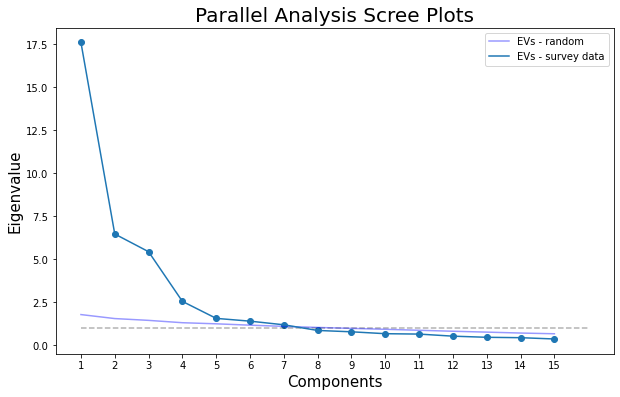

Factor eigenvalues for the 95th percentile of 100 random matricesand for survey data for first 15 factors:

Factor	EV - random data 95h perc.	EV survey data
1	1.79				17.61
2	1.56				6.47
3	1.45				5.44
4	1.31				2.55
5	1.25				1.57
6	1.17				1.40
7	1.10				1.19
8	1.04				0.86
9	0.99				0.79
10	0.93				0.68
11	0.87				0.65
12	0.82				0.53
13	0.77				0.47
14	0.71				0.44
15	0.67				0.37


In [24]:
# OUtput become too hard to read with too many factors
# Only display a part of the EVs
facs_to_display = 15

plt.figure(figsize=(10, 6))

# Line for eigenvalue 1
plt.plot([1, facs_to_display+1], [1, 1], 'k--', alpha=0.3)
# For the random data (parallel analysis)
plt.plot(range(1, len(par_95per[:facs_to_display])+1),
         par_95per[:facs_to_display], 'b', label='EVs - random', alpha=0.4)
# Markers and line for actual EFA eigenvalues
plt.scatter(
    range(1, len(ev_efa[:facs_to_display])+1), ev_efa[:facs_to_display])
plt.plot(range(1, len(ev_efa[:facs_to_display])+1),
         ev_efa[:facs_to_display], label='EVs - survey data')

plt.title('Parallel Analysis Scree Plots', {'fontsize': 20})
plt.xlabel('Components', {'fontsize': 15})
plt.xticks(ticks=range(1, facs_to_display+1),
           labels=range(1, facs_to_display+1))
plt.ylabel('Eigenvalue', {'fontsize': 15})
plt.legend()
plt.show()

# Generate simple table with values for 95th percentile for random data and EVs for actual data

print("Factor eigenvalues for the 95th percentile of {} random matricesand for survey data for first {} factors:\n".
      format(k, facs_to_display))
print("\033[1mFactor\tEV - random data 95h perc.\tEV survey data\033[0m")

last_index = 0
last_95per_par = 0
last_ev_efa = 0
found_threshold = False

# Loop that prints previous (!) values
# if current EV from survey data is smaller than 95th percentile from random data, we reached the threshold
# in that case print the previous values in bold as it marks the number of factors determined by parallel analysis
for index, cur_ev_par in par_95per[:facs_to_display].iteritems():
    cur_ev_efa = ev_efa[index-1]
    if (index > 1) & (cur_ev_par >= cur_ev_efa) & (found_threshold == False):
        found_threshold = True
        print("\033[1m{}\t{:.2f}\t\t\t\t{:.2f}\033[0m".format(
            last_index, last_95per_par, last_ev_efa))
    elif (index > 1):
        print("{}\t{:.2f}\t\t\t\t{:.2f}".format(
            last_index, last_95per_par, last_ev_efa))

    if index == len(par_95per[:facs_to_display]):
        print("{}\t{:.2f}\t\t\t\t{:.2f}".format(index, cur_ev_par, cur_ev_efa))

    last_index = index
    last_95per_par = cur_ev_par
    last_ev_efa = cur_ev_efa

# determine factors to investigate based on screeplot and parallel analysis
# if both methods yield different results, examine both number of factors
# (decide for one based on whether you get a clean solution and on how interpretable the solution is)

In [25]:
# Decide on rotation (orthogonal: Varimax, oblique: Oblimin)

# Run orthogonal rotation
efa = fa.FactorAnalyzer(n_factors=4, rotation='varimax')
efa.fit(tss_df[items_analysis_li])
# Display rotation matrix
# Shows correlation between factors before rotation (rows) and after (columns)
print("Rotation Matrix (Orthogonal Rotation):")
print(efa.rotation_matrix_)
# If matrix is non-symetrical, this indicates that an oblique rotation is called for

# Run oblique rotation
efa = fa.FactorAnalyzer(n_factors=4, rotation='oblimin')
efa.fit(tss_df[items_analysis_li])
# Display factor correlation matrix
print("\nFactor Correlation Matrix (Oblique Rotation):")
print(efa.phi_)
# If matrix has clear correlations between factors, than this indicates the need for an oblique rotation
# if in doubt use oblique

Rotation Matrix (Orthogonal Rotation):
[[ 0.66667084 -0.20615456 -0.42374601 -0.5774856 ]
 [ 0.69432411  0.51927192  0.32485675  0.37780789]
 [ 0.05008243 -0.25183029  0.8437222  -0.47138743]
 [ 0.26637526 -0.7902142   0.05513866  0.54914977]]

Factor Correlation Matrix (Oblique Rotation):
[[ 1.          0.36346696 -0.23045859  0.29600167]
 [ 0.36346696  1.         -0.24156052  0.08526672]
 [-0.23045859 -0.24156052  1.         -0.16465266]
 [ 0.29600167  0.08526672 -0.16465266  1.        ]]


In [64]:
abs(loadings.loc["tss_coh_1"]).max()

0.7748984319069806

In [160]:
def iterative_efa(data, vars_analsis, n_facs=4, rotation_method="Oblimin",
                  comm_thresh=0.2, main_thresh=0.32, cross_thres=0.32, suppres_n_items=5,
                  print_cross_load=False):
    efa = fa.FactorAnalyzer(n_factors=n_facs, rotation=rotation_method)

    final_solution = False

    curr_vars = copy.deepcopy(vars_analsis)

    i = 1
    while final_solution == False:
        # Fit EFA
        efa.fit(data[curr_vars])
        print("Fitted solution #{}\n".format(i))

        # Check 1: Check communcalities
        print("Checking for low communalities")
        comms = pd.DataFrame(efa.get_communalities(
        ), index=tss_df[curr_vars].columns, columns=['Communality'])
        mask_low_comms = comms["Communality"] < comm_thresh

        if comms[mask_low_comms].empty:
            print("All communalities above {}\n".format(comm_thresh))
        else:
            # save bad items and remove them
            bad_items = comms[mask_low_comms].index
            print("Detected {} items with low communality. Excluding them for next analysis.\n".format(
                len(bad_items)))
            suppress_details = True if len(
                bad_items) >= suppres_n_items else False
            for item in bad_items:
                if suppress_details == False:
                    print("Removed item {}: {}\nCommunality: {:.2f}\n".format(
                        item, items_descr[item], comms.loc[item, "Communality"]))
                curr_vars.remove(item)
            i += 1
            continue

        # Check 2: Check for low main loading
        print("Checking for low main loading")
        loadings = pd.DataFrame(efa.loadings_, index=data[curr_vars].columns)
        max_loadings = abs(loadings).max(axis=1)
        mask_low_main = max_loadings < main_thresh
        if max_loadings[mask_low_main].empty:
            print("All main loadings above {}\n".format(main_thresh))
        else:
            # save bad items and remove them
            bad_items = max_loadings[mask_low_main].index
            print("Detected {} items with low main loading. Excluding them for next analysis.\n".format(
                len(bad_items)))
            suppress_details = True if len(
                bad_items) >= suppres_n_items else False
            for item in bad_items:
                if suppress_details == False:
                    print("Removed item {}: {}\nMain (absolute) Loading: {:.2f}\n".format(
                        item, items_descr[item], abs(loadings.loc[item]).max()))
                curr_vars.remove(item)
            i += 1
            continue

        # check 3: Check for high cross loadings
        print("Checking for low main loading")
        # get the second largest absolute value for each var
        second_largest_load = abs(loadings).apply(
            lambda row: row.nlargest(2).values[-1], axis=1)
        mask_high_cross = second_largest_load > cross_thres
        if second_largest_load[mask_high_cross].empty:
            print("All cross_loadins loadings below {}\n".format(cross_thres))
        else:
            # save bad items and remove them
            bad_items = second_largest_load[mask_high_cross].index
            print("Detected {} items with high cross loading. Excluding them for next analysis.\n".format(
                len(bad_items)))
            suppress_details = True if len(
                bad_items) >= suppres_n_items else False
            for item in bad_items:
                if suppress_details == False:
                    print("Removed item {}: {}\nLoadings: \n{}\n".format(
                        item, items_descr[item]))
                    if print_cross_load:
                        print("Loadings: \n{}".format(loadings.loc[item]))
                curr_vars.remove(item)
            i += 1
            continue

        i += 1
        print("Final solution reached.")
        final_solution = True

        corrs = data[curr_vars].corr()
        det = np.linalg.det(items_corr)
        print("\nDeterminant of correlation matrix: {}".format(det))
        if det > 0.00001:
            print("Determinant looks good!")
        else:
            print("Determinant is smaller than 0.00001!")
            print("Consider using stricer criteria and/or removing highly correlated vars")
            
        kmo = fa.factor_analyzer.calculate_kmo(data[curr_vars])
        print("Overall KMO: {}".format(kmo[1]))
        
        i = 0
        low_item_kmo = False
        for item_kmo in kmo[0]:
            if item_kmo < .6:
                low_item_kmo = True
                item_label = curr_vars[i]
                print("Low KMO for {} ('{}'): {}".format(
                    item_label, items_descr[item_label], item_kmo))
            i += 1
        if low_item_kmo == False:
            print("All item KMOs are >.6")

# Determinant should be > .00001

    return(efa, curr_vars)

# print relevant loadings for each factor to output


def sorted_loadings(efa, item_lables, load_thresh=0.32, descr=[]):
    loadings = pd.DataFrame(efa_4.loadings_, index=items_4)
    n_load = loadings.shape[1]

    if len(descr) > 0:
        loadings["descr"] = loadings.apply(lambda x: descr[x.name], axis=1)

    for i in range(0, n_load):
        print("Relevant loadings for factor {}".format(i))
        mask_relev_loads = loadings[i] > load_thresh
        sorted_loads = loadings[mask_relev_loads].sort_values(
            i, key=abs, ascending=False)
        print(sorted_loads[[i, "descr"]].to_string(), "\n")

In [157]:
items_descr["tss_sty_11"]

"The author's choice of words was elegant"

In [165]:
four_facs = iterative_efa(tss_df, items_analysis_li, suppres_n_items=1, comm_thresh=0.2)

Fitted solution #1

Checking for low communalities
Detected 6 items with low communality. Excluding them for next analysis.

Fitted solution #2

Checking for low communalities
All communalities above 0.2

Checking for low main loading
All main loadings above 0.32

Checking for low main loading
Detected 13 items with high cross loading. Excluding them for next analysis.

Fitted solution #3

Checking for low communalities
Detected 1 items with low communality. Excluding them for next analysis.

Fitted solution #4

Checking for low communalities
All communalities above 0.2

Checking for low main loading
All main loadings above 0.32

Checking for low main loading
Detected 1 items with high cross loading. Excluding them for next analysis.

Fitted solution #5

Checking for low communalities
All communalities above 0.2

Checking for low main loading
All main loadings above 0.32

Checking for low main loading
Detected 1 items with high cross loading. Excluding them for next analysis.

Fitted s

In [151]:
efa_4 = four_facs[0]
items_4 = four_facs[1]

# loadings = pd.DataFrame(efa_4.loadings_, index=items_4)
# loadings["descr"] = loadings.apply(lambda x: items_descr[x.name], axis=1)
# loadings.sort_values(1, key = abs, ascending = False)
sorted_loadings(efa_4, items_4, load_thresh = 0.32, descr = items_descr)

Relevant loadings for factor 0
                    0                                                                     descr
tss_coh_10   0.800220                                The story had a clearly identifiable plot.
tss_coh_8    0.769975                         The story stayed on topic with a consistent plot.
tss_coh_6    0.700474                                     The story felt like a coherent story.
tss_coh_4    0.674490                                      The plot of the story was plausible.
tss_coh_11   0.625974                                              The story had a clear theme.
tss_conch_8  0.559189  It was easy to understand the motivation of the characters in the story.
tss_pac_8    0.541175                      All elements of the story were relevant to the plot.
tss_coh_5    0.511239                         This story’s events occurred in a plausible order
tss_cre_11   0.413032                              The plot was typical for this kind of story. 

Relevan